# Stock Analysis Experiments

## Setup

Install yfinance
```
$ conda install -c conda-forge yfinance
```

In [1]:
import matplotlib.pyplot as plt

from core.ticker import Ticker, TickerManager

## Load Stock Price Data

The `Ticker` class pulls price/volume data from the web via the yfinance package and saves it to disk for faster loading in the future.

The following cell demonstrates the form this data takes.

In [2]:
ticker_manager = TickerManager()
await ticker_manager.load(["GOOG"])

goog_ticker = ticker_manager.get_ticker("GOOG")
goog_ticker.print_info()

todays_date = goog_ticker.get_date(as_str=True)
three_days_ago = goog_ticker.get_date(days_offset=-3, as_str=True)
print(f"Today is {todays_date}, three days ago was {three_days_ago}")

goog_df = goog_ticker.dataframe
print(f"Most recent close on {goog_df.index[-1]} is {goog_df.iloc[-1].Close}")

INFO:core.ticker:got GOOG from pickle
INFO:core.ticker:now scraping, start date = 2023-5-20, end date = 2023-5-20
INFO:core.ticker:got GOOG from scraping, start date = 2023-5-20, end date = 2023-5-20


Symbol is: GOOG
First five entries:
--------
                                Open       High        Low      Close  \
Date                                                                    
2013-05-22 00:00:00-04:00  22.479740  22.647860  22.089205  22.152468   
2013-05-23 00:00:00-04:00  21.843126  22.165916  21.768408  21.987335   
2013-05-24 00:00:00-04:00  21.799789  21.888456  21.693935  21.751471   
2013-05-28 00:00:00-04:00  22.005020  22.220213  21.927809  21.949478   
2013-05-29 00:00:00-04:00  21.810997  21.867785  21.526564  21.626688   

                              Volume  Dividends  Stock Splits  
Date                                                           
2013-05-22 00:00:00-04:00  102807910        0.0           0.0  
2013-05-23 00:00:00-04:00   91345105        0.0           0.0  
2013-05-24 00:00:00-04:00   92216359        0.0           0.0  
2013-05-28 00:00:00-04:00   90638467        0.0           0.0  
2013-05-29 00:00:00-04:00   80837869        0.0           0

## Plot Chart Using matplotlib

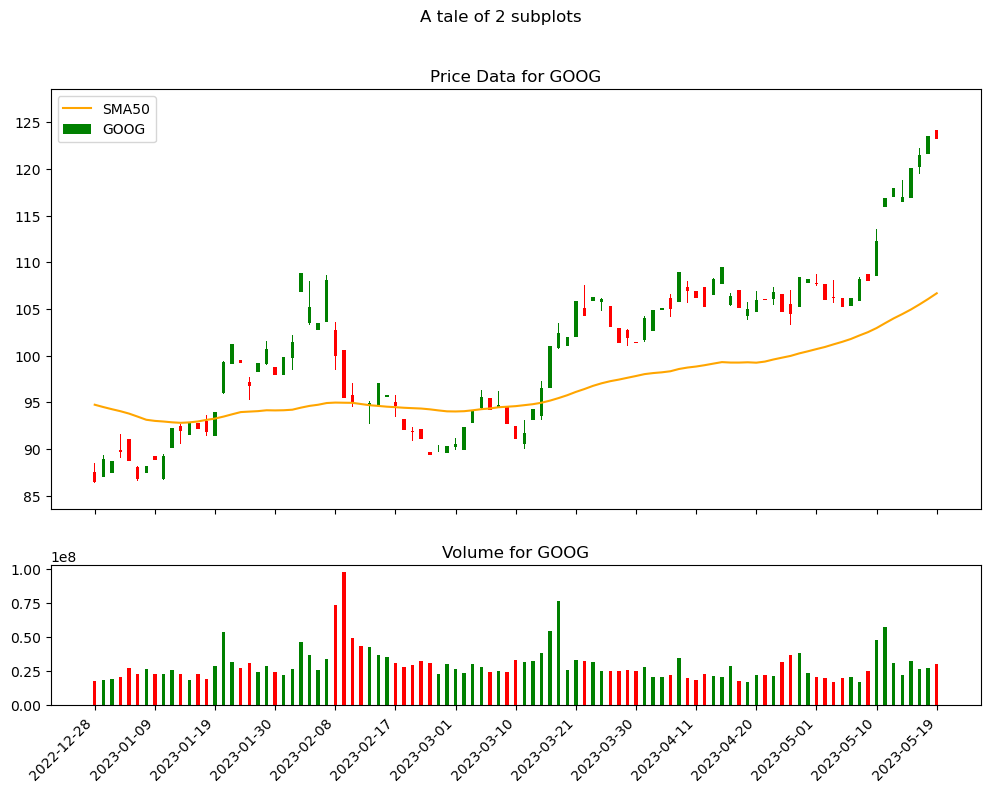

In [3]:
my_ticker = goog_ticker
my_ticker.add_sma(50)
# Get past 50 days of data
prices, x_indices, datelabels = my_ticker.get_plotable_dataframe(-100, -1, spacing=7)

# Create figure with two subplots, one for price data and one for volume
#   2, 1 = two rows, one column
#   height_ratios=(3,1) means that upper subplot is 3 times taller
figure, (axes1, axes2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3,1))
figure.suptitle('A tale of 2 subplots')

# Define width of candlestick elements, the candle and wick
width_candle = .4
width_wick = .05

# Define up and down prices as two different DFs
up = prices[prices.Close>=prices.Open]
down = prices[prices.Close<prices.Open]

# Define colors to use
col1 = 'green'
col2 = 'red'

########### Price subplot

# Plot 'up' prices
axes1.bar(up.index, up.Close-up.Open, width_candle, bottom=up.Open, color=col1, label=my_ticker.symbol)
axes1.bar(up.index, up.High-up.Close, width_wick, bottom=up.Close, color=col1)
axes1.bar(up.index, up.Low-up.Open, width_wick, bottom=up.Open,color=col1)

# Plot 'down' prices
axes1.bar(down.index, down.Close-down.Open, width_candle, bottom=down.Open, color=col2)
axes1.bar(down.index, down.High-down.Open, width_wick, bottom=down.Open, color=col2)
axes1.bar(down.index, down.Low-down.Close, width_wick, bottom=down.Close, color=col2)

# Plot SMA
sma_series = prices["SMA50"]
sma_list = list(sma_series.array)
axes1.plot(sma_list, color='orange', label="SMA50")

# Put ticks but no labels at bottom
axes1.set_xticks(x_indices, labels=["" for i in range(len(x_indices))])

axes1.set_title(f"Price Data for {my_ticker.symbol}")
axes1.legend()

########### Volume subplot

# Plot 'up' volume
axes2.bar(up.index, up.Volume, width_candle, bottom=0, color=col1)

# Plot 'down' volume
axes2.bar(down.index, down.Volume, width_candle, bottom=0, color=col2)

# Add x-axis ticks and labels with dates
axes2.set_xticks(x_indices, labels=datelabels, rotation=45, ha='right')

axes2.set_title(f"Volume for {my_ticker.symbol}")

plt.show()